In [ ]:
# Code Reference
# https://www.kaggle.com/paultimothymooney/interpret-sign-language-with-deep-learning/notebook
# https://www.kaggle.com/ahmedkhanak1995/cnn-on-sign-language-gesture-images-dataset/data

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.models import Sequential, save_model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import os
import cv2

In [2]:
dict_labels = {
    '0':1, '1':2, '2':3, '3':4, '4':5, '5':6, '6':7, '7':8, '8':9, '9':10,
    'a':11, 'b':12, 'c':13, 'd':14, 'e':15, 'f':16, 'g':17, 'h':18, 'i':19,
    'j':20, 'k':21, 'l':22, 'm':23, 'n':24, 'o':25, 'p':26, 'q':27, 'r':28,
    's':29, 't':30, 'u':31, 'v':32, 'w':33, 'x':34, 'y':35, 'z':36, 
}

In [ ]:
# source_path = "asl/asl"
# test_data_path = "asl/test_asl/"
# files_dir = os.listdir(source_path)
# import shutil
# import numpy as np
# for f_dir in files_dir:
#     files=os.listdir(source_path + "/" + f_dir)
#     for f in files:
#         if np.random.rand(1) < 0.2:  # 8:2 
#             path = test_data_path + '/'+ f_dir
#             if not os.path.exists(path):
#                 os.makedirs(path)
#             shutil.move(source_path + '/'+ f_dir + "/" + f, path)

In [8]:
path = 'asl/asl'
gestures = os.listdir(path)[1:]

x = []
y = []

for ix in gestures:
    images = os.listdir(path +'/'+ix)
    print(ix)
    for cx in images:
        img_path = path+'/' +ix + '/' + cx
        img = cv2.imread(img_path, 1)
        img = cv2.resize(img, (50,50), interpolation = cv2.INTER_AREA)
#         img = img.reshape((50,50,3))
        x.append(img)
        y.append(dict_labels[ix])
        x.append(cv2.flip(img, 0));
        y.append(dict_labels[ix])

r
u
9
0
7
i
n
g
6
z
1
8
t
s
a
f
o
h
m
j
c
d
v
q
4
x
3
e
b
k
l
2
y
5
p
w


In [11]:
Y = to_categorical(np.array(y))
X = np.array(x)/255.0

In [12]:
path_test = 'asl/test_asl/'
gestures_test = os.listdir(path_test)[1:]

In [13]:
x_test = []
y_test = []

path_test = 'asl/test_asl/'
gestures_test = os.listdir(path_test)[1:]

for ix in gestures_test:
    images = os.listdir(path_test +ix)
    print(ix)
    for cx in images:
        img_path = path_test+'/' +ix + '/' + cx
        img = cv2.imread(img_path, 1)
        img = cv2.resize(img, (50,50), interpolation = cv2.INTER_AREA)
#         img = img.reshape((100,100,3))
        x_test.append(img)
        y_test.append(dict_labels[ix])
        x_test.append(cv2.flip(img, 0))
        y_test.append(dict_labels[ix])

r
u
9
0
7
i
n
g
6
z
1
8
t
s
a
f
o
h
m
j
c
d
v
q
4
x
3
e
b
k
l
2
y
5
p
w


In [14]:
Y_test = to_categorical(np.array(y_test))
X_test = np.array(x_test)/255.0

In [15]:
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.2,shuffle=True)

In [9]:
import keras
from keras.applications.vgg16 import VGG16
from sklearn.utils import class_weight
from keras import models, layers, optimizers
from keras.models import Model
import sklearn

class_weight1 = class_weight.compute_class_weight('balanced', np.unique(y), y)
weight_path1 = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'
pretrained_model_1 = VGG16(weights = weight_path1, include_top=False, input_shape=(50, 50, 3))

def pretrainedNetwork(xtrain,ytrain,xtest,ytest,pretrainedmodel,pretrainedweights,classweight,numclasses,numepochs,labels):
    base_model = pretrained_model_1 # Topless
    # Add top layer
    x = base_model.output
    x = Flatten()(x)
    predictions = Dense(numclasses, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=predictions)
    # Train top layer
    for layer in base_model.layers:
        layer.trainable = False
        
    model.compile(loss='categorical_crossentropy', 
                  optimizer='adam', 
                  metrics=['accuracy'])
    callbacks_list = [keras.callbacks.EarlyStopping(monitor='val_acc', patience=3, verbose=1)]
    model.summary()
    
    # Fit model
#     history = model.fit(xtrain,ytrain, epochs=numepochs, class_weight=classweight, validation_data=(xtest,ytest), verbose=1,callbacks = [MetricsCheckpoint('logs')])
    history = model.fit(xtrain,ytrain, epochs=numepochs, batch_size=64,validation_data=(xtest,ytest))

    # Evaluate model
    score = model.evaluate(xtest,ytest, verbose=0)
    print('\nKeras CNN - accuracy:', score[1], '\n')
#     y_pred = model.predict(xtest)
#     print('\n', sklearn.metrics.classification_report(np.where(ytest > 0)[1], np.argmax(y_pred, axis=1), target_names=list(labels.values()))) 
#     Y_pred_classes = np.argmax(y_pred,axis = 1) 
#     Y_true = np.argmax(ytest,axis = 1) 


#     confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
#     plotKerasLearningCurve()
#     plt.show()
#     plot_learning_curve(history)
#     plt.show()
#     plot_confusion_matrix(confusion_mtx, classes = list(labels.values()))
#     plt.show()
    return model,history
themodel = pretrainedNetwork(X_train, Y_train, X_val, Y_val, pretrained_model_1,weight_path1,class_weight1,37,100,dict_labels)

Using TensorFlow backend.
/Users/xiaoyangpan/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:72: FutureWarning: Pass classes=[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36], y=[28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50, 50, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 50, 50, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 50, 50, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 25, 25, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 25, 25, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 25, 25, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 12, 12, 128)       0     

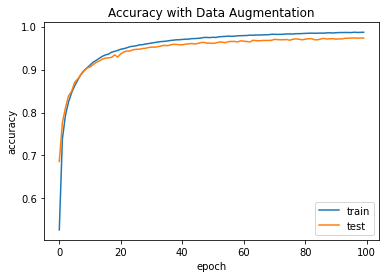

In [10]:
import matplotlib.pyplot as plt

plt.plot(themodel[1].history['accuracy'])
plt.plot(themodel[1].history['val_accuracy'])
plt.title("Accuracy with Data Augmentation")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()


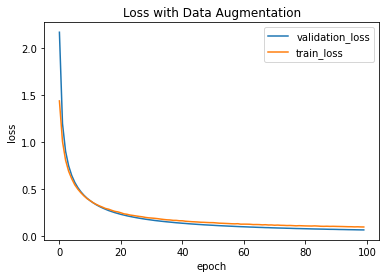

In [11]:
plt.plot(themodel[1].history['loss'])
plt.plot(themodel[1].history['val_loss'])
plt.title("Loss with Data Augmentation")
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['validation_loss','train_loss'])
plt.show()

In [12]:
y_pred = themodel[0].predict(X_test)
print(sklearn.metrics.classification_report(np.where(Y_test > 0)[1], np.argmax(y_pred, axis=1))) 

              precision    recall  f1-score   support

           1       0.91      0.94      0.92       294
           2       0.97      0.97      0.97       258
           3       0.88      0.94      0.91       278
           4       1.00      1.00      1.00       268
           5       0.99      0.98      0.98       288
           6       0.98      0.99      0.99       280
           7       0.90      0.87      0.88       294
           8       0.98      0.98      0.98       244
           9       0.98      0.96      0.97       286
          10       1.00      1.00      1.00       266
          11       0.99      0.98      0.99       302
          12       1.00      1.00      1.00       294
          13       1.00      1.00      1.00       254
          14       0.99      0.99      0.99       302
          15       1.00      1.00      1.00       264
          16       1.00      1.00      1.00       270
          17       1.00      1.00      1.00       268
          18       1.00    

In [ ]:
# Y_pred_classes = np.argmax(y_pred,axis = 1) 
# Y_true = np.argmax(Y_test,axis = 1)

In [13]:
themodel[0].save("vgg1datawithflip")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: vgg1datawithflip/assets


In [15]:
import pickle

f = open('vgg1datawithflipHis','wb')
pickle.dump(themodel[1].history,f)
f.close()

In [9]:
model = tf.keras.models.load_model("vgg1datawithflip")
model.evaluate(X_test,Y_test)

In [16]:
model.evaluate(X_test,Y_test)

318/318 [==============================] - 63s 199ms/step - loss: 0.0979 - accuracy: 0.9699


[0.09791835397481918, 0.9698877930641174]